# The Metric Tensor in Differential Geometry

## 1. Introduction

The **metric tensor** is a fundamental object in differential geometry that allows us to measure distances, angles, and volumes on a manifold. It generalizes the notion of the dot product from Euclidean space to curved spaces.

## 2. Mathematical Definition

### 2.1 The Metric Tensor

A metric tensor $g$ on a smooth manifold $M$ is a symmetric, positive-definite $(0,2)$-tensor field. At each point $p \in M$, the metric tensor provides an inner product on the tangent space $T_pM$:

$$g_p : T_pM \times T_pM \rightarrow \mathbb{R}$$

In local coordinates $(x^1, x^2, \ldots, x^n)$, the metric tensor is expressed as:

$$g = g_{\mu\nu} \, dx^\mu \otimes dx^\nu$$

where $g_{\mu\nu}$ are the components of the metric tensor, and Einstein summation convention is implied.

### 2.2 The Line Element

The infinitesimal distance (line element) between two nearby points is given by:

$$ds^2 = g_{\mu\nu} \, dx^\mu \, dx^\nu$$

This generalizes the Pythagorean theorem to curved spaces.

### 2.3 Properties

The metric tensor satisfies:
- **Symmetry:** $g_{\mu\nu} = g_{\nu\mu}$
- **Positive-definiteness:** For any non-zero vector $v^\mu$, we have $g_{\mu\nu} v^\mu v^\nu > 0$
- **Non-degeneracy:** $\det(g_{\mu\nu}) \neq 0$

### 2.4 The Inverse Metric

The inverse metric $g^{\mu\nu}$ is defined by:

$$g^{\mu\lambda} g_{\lambda\nu} = \delta^\mu_\nu$$

where $\delta^\mu_\nu$ is the Kronecker delta.

## 3. Examples of Metric Tensors

### 3.1 Euclidean Metric (Flat Space)

In Cartesian coordinates $(x, y, z)$:

$$g_{\mu\nu} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}, \quad ds^2 = dx^2 + dy^2 + dz^2$$

### 3.2 Spherical Coordinates

For 3D space in spherical coordinates $(r, \theta, \phi)$:

$$g_{\mu\nu} = \begin{pmatrix} 1 & 0 & 0 \\ 0 & r^2 & 0 \\ 0 & 0 & r^2 \sin^2\theta \end{pmatrix}$$

$$ds^2 = dr^2 + r^2 d\theta^2 + r^2 \sin^2\theta \, d\phi^2$$

### 3.3 The 2-Sphere $S^2$

For a sphere of radius $R$:

$$g_{\mu\nu} = \begin{pmatrix} R^2 & 0 \\ 0 & R^2 \sin^2\theta \end{pmatrix}$$

$$ds^2 = R^2 \left( d\theta^2 + \sin^2\theta \, d\phi^2 \right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up high-quality figure defaults
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'

## 4. Computational Implementation

### 4.1 Metric Tensor Class

We implement a class to handle metric tensor operations:

In [2]:
class MetricTensor:
    """
    A class representing a metric tensor on a 2D surface.
    
    The metric tensor g_ij allows computation of:
    - Arc length: ds² = g_ij dx^i dx^j
    - Angles between vectors
    - Area elements: dA = sqrt(det(g)) dx¹ dx²
    """
    
    def __init__(self, g_func):
        """
        Initialize with a function g_func(coords) that returns the metric matrix.
        
        Parameters:
        -----------
        g_func : callable
            Function taking coordinates and returning 2x2 metric matrix
        """
        self.g_func = g_func
    
    def metric_at(self, coords):
        """Return the metric tensor matrix at given coordinates."""
        return self.g_func(coords)
    
    def inverse_metric_at(self, coords):
        """Return the inverse metric tensor at given coordinates."""
        g = self.metric_at(coords)
        return np.linalg.inv(g)
    
    def determinant_at(self, coords):
        """Return the determinant of the metric tensor."""
        g = self.metric_at(coords)
        return np.linalg.det(g)
    
    def line_element(self, coords, dcoords):
        """
        Compute the infinitesimal line element ds² = g_ij dx^i dx^j.
        
        Parameters:
        -----------
        coords : array-like
            Point coordinates
        dcoords : array-like
            Infinitesimal coordinate displacements
        
        Returns:
        --------
        float : ds² value
        """
        g = self.metric_at(coords)
        dcoords = np.array(dcoords)
        return dcoords @ g @ dcoords
    
    def vector_norm(self, coords, vector):
        """Compute the norm of a vector at given coordinates."""
        ds_squared = self.line_element(coords, vector)
        return np.sqrt(ds_squared)
    
    def inner_product(self, coords, v1, v2):
        """Compute the inner product of two vectors: g_ij v1^i v2^j."""
        g = self.metric_at(coords)
        return np.array(v1) @ g @ np.array(v2)
    
    def angle_between(self, coords, v1, v2):
        """Compute the angle between two vectors using the metric."""
        inner = self.inner_product(coords, v1, v2)
        norm1 = self.vector_norm(coords, v1)
        norm2 = self.vector_norm(coords, v2)
        cos_theta = inner / (norm1 * norm2)
        # Clamp to avoid numerical issues
        cos_theta = np.clip(cos_theta, -1, 1)
        return np.arccos(cos_theta)
    
    def area_element(self, coords):
        """Return sqrt(det(g)), the area element factor."""
        return np.sqrt(self.determinant_at(coords))

### 4.2 Define Standard Metrics

We define several common metric tensors for analysis:

In [3]:
def euclidean_metric_2d(coords):
    """Flat Euclidean metric in 2D Cartesian coordinates."""
    return np.array([[1, 0], [0, 1]], dtype=float)

def polar_metric(coords):
    """
    Metric for flat 2D space in polar coordinates (r, θ).
    ds² = dr² + r² dθ²
    """
    r, theta = coords
    return np.array([[1, 0], [0, r**2]], dtype=float)

def sphere_metric(coords, R=1.0):
    """
    Metric for a 2-sphere of radius R in coordinates (θ, φ).
    ds² = R²(dθ² + sin²θ dφ²)
    """
    theta, phi = coords
    return np.array([[R**2, 0], [0, R**2 * np.sin(theta)**2]], dtype=float)

def torus_metric(coords, R=2.0, r=1.0):
    """
    Metric for a torus with major radius R and minor radius r.
    Coordinates: (θ, φ) where θ is poloidal and φ is toroidal angle.
    ds² = r² dθ² + (R + r cos θ)² dφ²
    """
    theta, phi = coords
    return np.array([[r**2, 0], [0, (R + r * np.cos(theta))**2]], dtype=float)

def hyperbolic_poincare_metric(coords):
    """
    Poincaré disk model of hyperbolic space.
    Coordinates: (x, y) with x² + y² < 1
    ds² = 4(dx² + dy²) / (1 - x² - y²)²
    """
    x, y = coords
    r_sq = x**2 + y**2
    if r_sq >= 1:
        r_sq = 0.999  # Regularize at boundary
    scale = 4 / (1 - r_sq)**2
    return np.array([[scale, 0], [0, scale]], dtype=float)

# Create MetricTensor objects
euclidean = MetricTensor(euclidean_metric_2d)
polar = MetricTensor(polar_metric)
sphere = MetricTensor(lambda c: sphere_metric(c, R=1.0))
torus = MetricTensor(lambda c: torus_metric(c, R=2.0, r=1.0))
hyperbolic = MetricTensor(hyperbolic_poincare_metric)

print("Metric tensors defined successfully.")

Metric tensors defined successfully.


## 5. Visualization and Analysis

### 5.1 Metric Tensor Visualization

We visualize how the metric tensor varies across different surfaces by plotting ellipses that represent the unit circle under each metric.

In [4]:
def plot_metric_ellipse(ax, metric, coords, scale=0.15, color='blue', alpha=0.6):
    """
    Plot an ellipse representing the metric tensor at a point.
    The ellipse shows vectors of unit length under the metric.
    """
    g = metric.metric_at(coords)
    
    # Eigendecomposition to find principal axes
    eigenvalues, eigenvectors = np.linalg.eigh(g)
    
    # Semi-axes lengths (inverse sqrt of eigenvalues for unit circle in metric)
    a = scale / np.sqrt(eigenvalues[0])
    b = scale / np.sqrt(eigenvalues[1])
    
    # Rotation angle
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
    
    # Create ellipse points
    t = np.linspace(0, 2*np.pi, 100)
    ellipse_x = a * np.cos(t)
    ellipse_y = b * np.sin(t)
    
    # Rotate
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    x_rot = cos_a * ellipse_x - sin_a * ellipse_y + coords[0]
    y_rot = sin_a * ellipse_x + cos_a * ellipse_y + coords[1]
    
    ax.fill(x_rot, y_rot, color=color, alpha=alpha, edgecolor='black', linewidth=0.5)

def visualize_metric_field(metric, metric_name, xlim, ylim, nx=8, ny=8):
    """
    Visualize a metric tensor field by plotting ellipses across a grid.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    x_vals = np.linspace(xlim[0], xlim[1], nx)
    y_vals = np.linspace(ylim[0], ylim[1], ny)
    
    # Color based on determinant (area distortion)
    det_vals = []
    for x in x_vals:
        for y in y_vals:
            det_vals.append(metric.determinant_at([x, y]))
    
    det_min, det_max = min(det_vals), max(det_vals)
    
    idx = 0
    for x in x_vals:
        for y in y_vals:
            det = det_vals[idx]
            # Color from blue (small det) to red (large det)
            if det_max > det_min:
                norm_det = (det - det_min) / (det_max - det_min)
            else:
                norm_det = 0.5
            color = plt.cm.coolwarm(norm_det)
            plot_metric_ellipse(ax, metric, [x, y], scale=0.08, color=color)
            idx += 1
    
    ax.set_xlim(xlim[0] - 0.2, xlim[1] + 0.2)
    ax.set_ylim(ylim[0] - 0.2, ylim[1] + 0.2)
    ax.set_aspect('equal')
    ax.set_xlabel('Coordinate 1', fontsize=12)
    ax.set_ylabel('Coordinate 2', fontsize=12)
    ax.set_title(f'Metric Tensor Field: {metric_name}', fontsize=14)
    ax.grid(True, alpha=0.3)
    
    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=plt.Normalize(vmin=det_min, vmax=det_max))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
    cbar.set_label(r'$\sqrt{\det(g)}$ (Area Element)', fontsize=11)
    
    return fig, ax

### 5.2 Compare Different Metrics

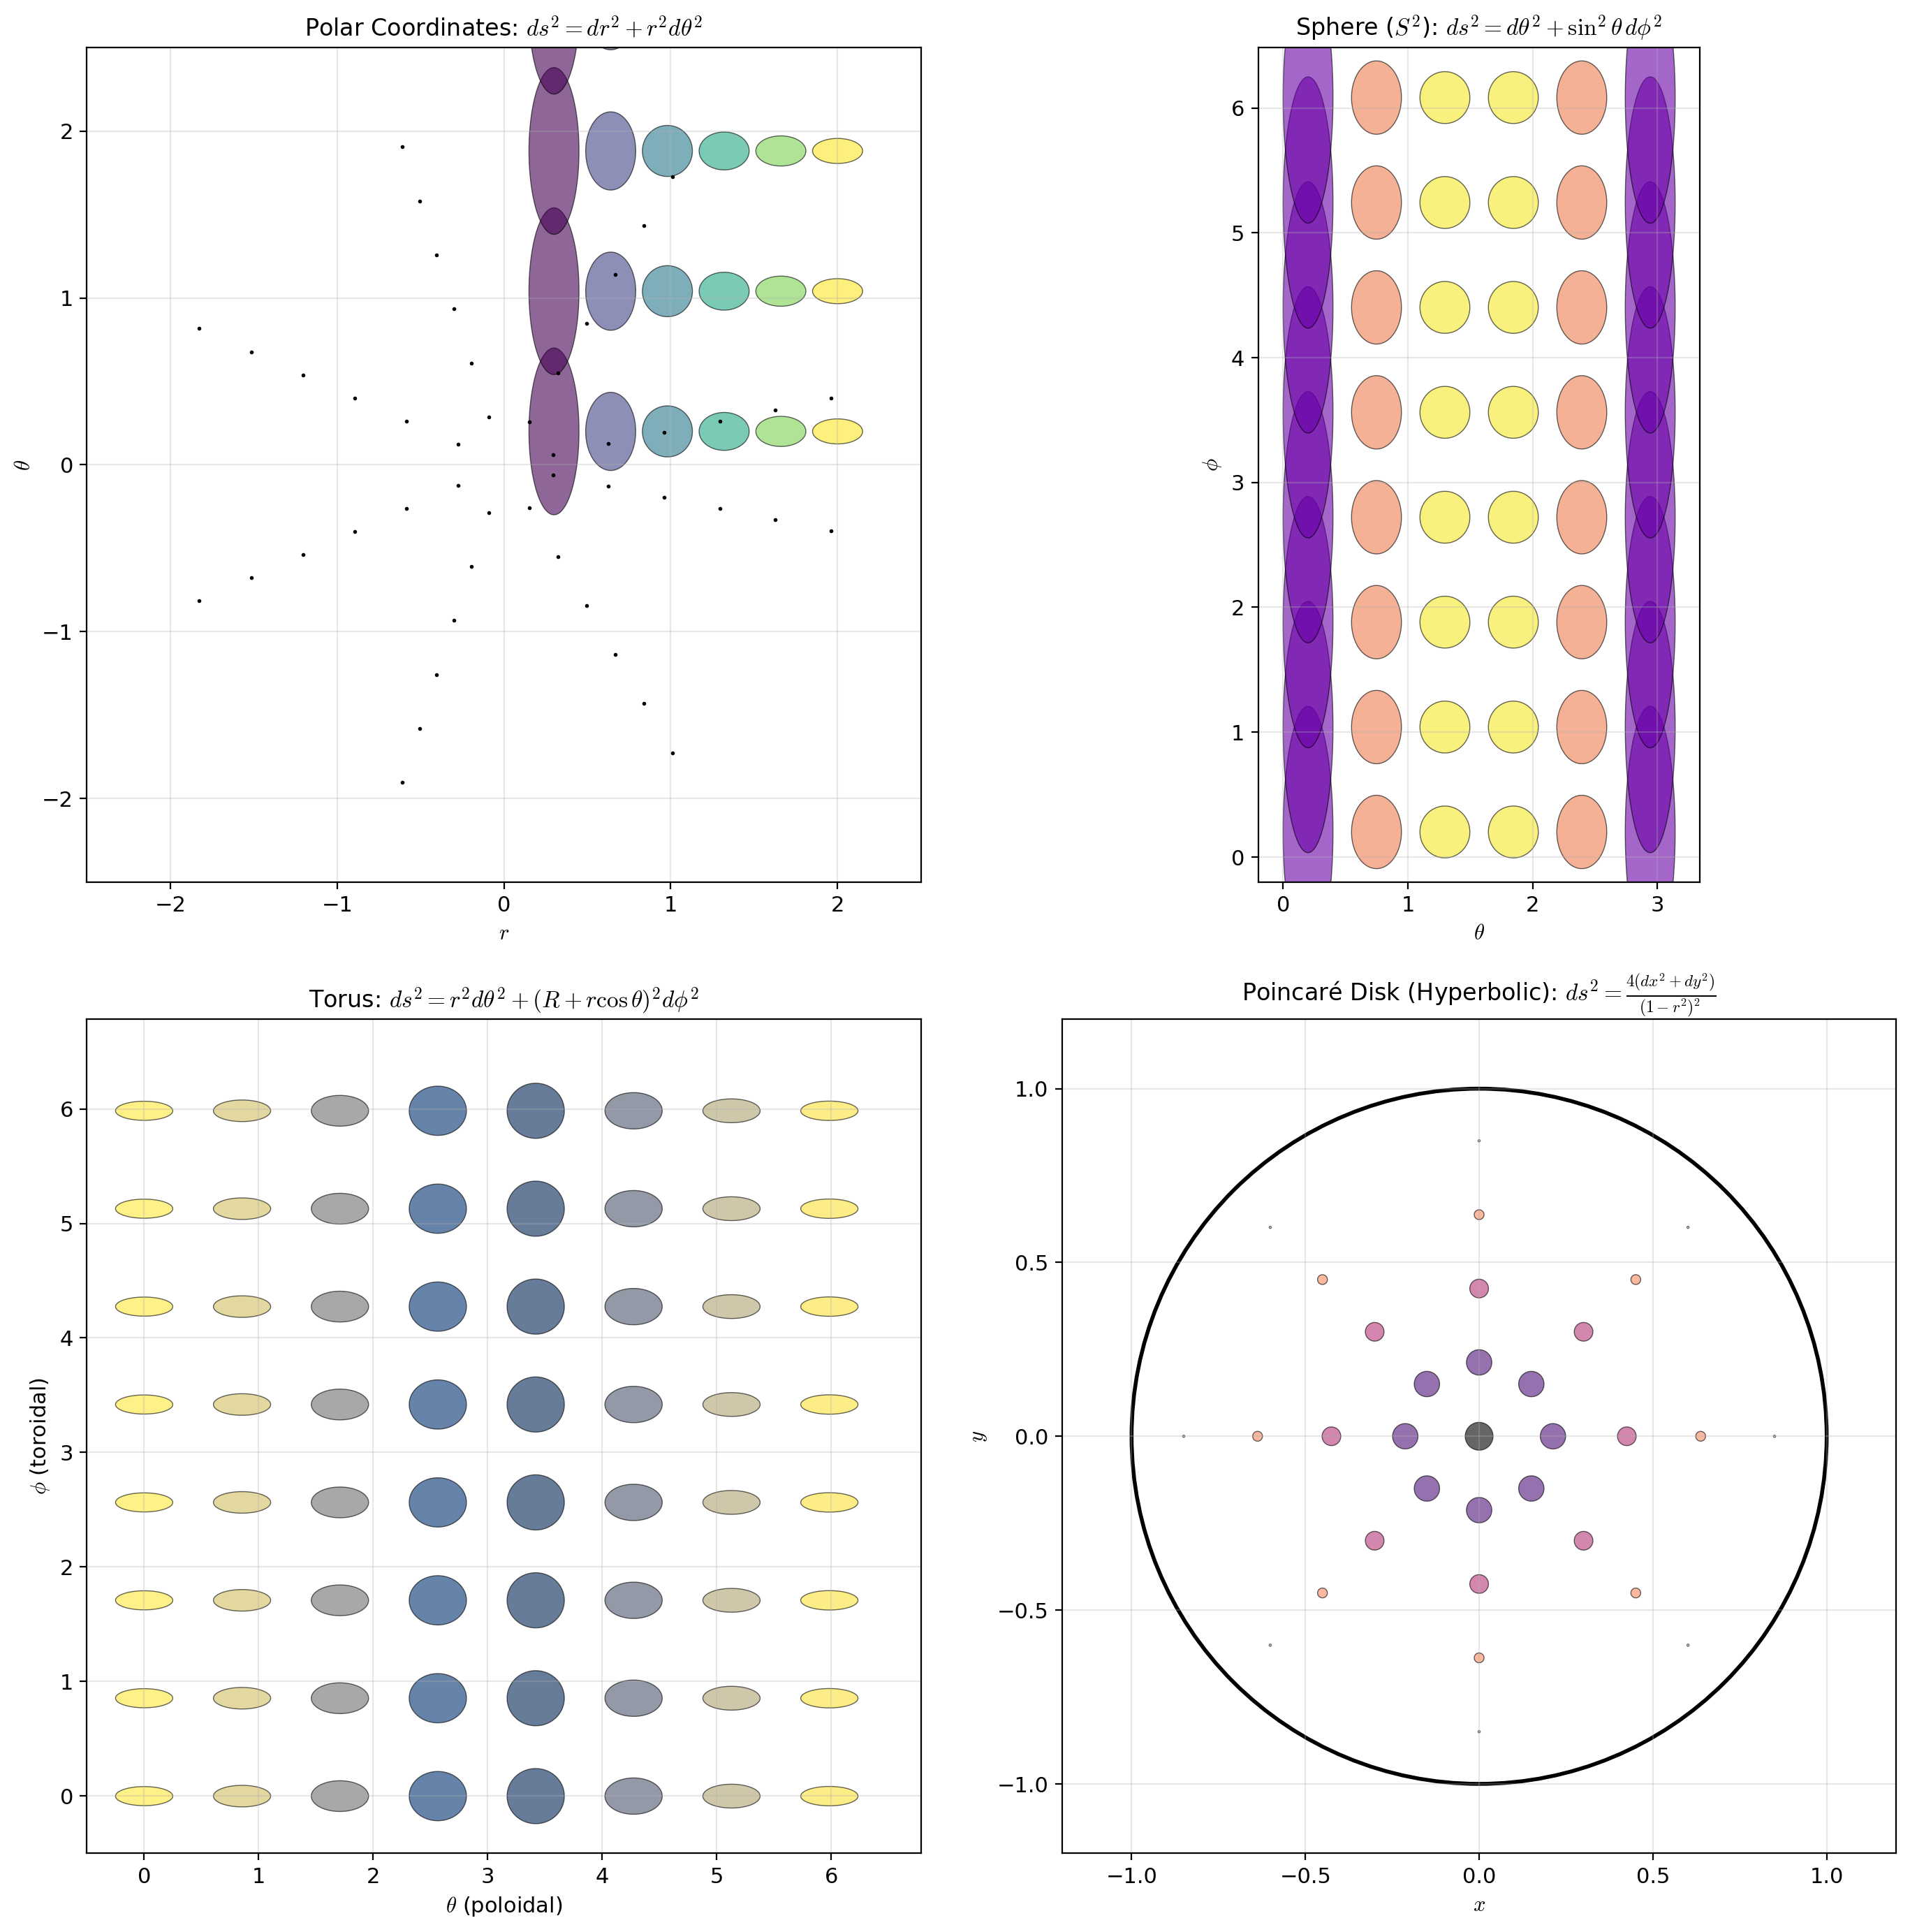

Figure saved to plot.png


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# 1. Polar coordinates metric
ax = axes[0, 0]
r_vals = np.linspace(0.3, 2.0, 6)
theta_vals = np.linspace(0.2, 2*np.pi - 0.2, 8)
for r in r_vals:
    for theta in theta_vals:
        det = polar.determinant_at([r, theta])
        norm_det = (r - 0.3) / 1.7
        color = plt.cm.viridis(norm_det)
        # Convert to Cartesian for plotting
        x, y = r * np.cos(theta), r * np.sin(theta)
        plot_metric_ellipse(ax, polar, [r, theta], scale=0.15, color=color)
        ax.plot(r * np.cos(theta), r * np.sin(theta), 'k.', markersize=2)

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_aspect('equal')
ax.set_title(r'Polar Coordinates: $ds^2 = dr^2 + r^2 d\theta^2$', fontsize=12)
ax.set_xlabel(r'$r$', fontsize=11)
ax.set_ylabel(r'$\theta$', fontsize=11)
ax.grid(True, alpha=0.3)

# 2. Sphere metric
ax = axes[0, 1]
theta_vals = np.linspace(0.2, np.pi - 0.2, 6)
phi_vals = np.linspace(0.2, 2*np.pi - 0.2, 8)
for theta in theta_vals:
    for phi in phi_vals:
        det = sphere.determinant_at([theta, phi])
        norm_det = np.sin(theta)
        color = plt.cm.plasma(norm_det)
        plot_metric_ellipse(ax, sphere, [theta, phi], scale=0.2, color=color)

ax.set_xlim(-0.2, np.pi + 0.2)
ax.set_ylim(-0.2, 2*np.pi + 0.2)
ax.set_aspect('equal')
ax.set_title(r'Sphere ($S^2$): $ds^2 = d\theta^2 + \sin^2\theta\, d\phi^2$', fontsize=12)
ax.set_xlabel(r'$\theta$', fontsize=11)
ax.set_ylabel(r'$\phi$', fontsize=11)
ax.grid(True, alpha=0.3)

# 3. Torus metric
ax = axes[1, 0]
theta_vals = np.linspace(0, 2*np.pi - 0.3, 8)
phi_vals = np.linspace(0, 2*np.pi - 0.3, 8)
for theta in theta_vals:
    for phi in phi_vals:
        g_phi_phi = (2.0 + 1.0 * np.cos(theta))**2
        norm_det = (np.cos(theta) + 1) / 2
        color = plt.cm.cividis(norm_det)
        plot_metric_ellipse(ax, torus, [theta, phi], scale=0.25, color=color)

ax.set_xlim(-0.5, 2*np.pi + 0.5)
ax.set_ylim(-0.5, 2*np.pi + 0.5)
ax.set_aspect('equal')
ax.set_title(r'Torus: $ds^2 = r^2 d\theta^2 + (R + r\cos\theta)^2 d\phi^2$', fontsize=12)
ax.set_xlabel(r'$\theta$ (poloidal)', fontsize=11)
ax.set_ylabel(r'$\phi$ (toroidal)', fontsize=11)
ax.grid(True, alpha=0.3)

# 4. Hyperbolic (Poincaré disk) metric
ax = axes[1, 1]
r_vals = np.linspace(0, 0.85, 5)
theta_vals = np.linspace(0, 2*np.pi, 8, endpoint=False)
for r in r_vals:
    for theta in theta_vals:
        if r == 0:
            x, y = 0, 0
            if theta > 0:
                continue
        else:
            x, y = r * np.cos(theta), r * np.sin(theta)
        norm_det = r / 0.85
        color = plt.cm.magma(norm_det)
        scale = 0.08 * (1 - r**2) if r < 0.9 else 0.01
        plot_metric_ellipse(ax, hyperbolic, [x, y], scale=scale, color=color)

# Draw boundary circle
circle = plt.Circle((0, 0), 1, fill=False, color='black', linewidth=2)
ax.add_patch(circle)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect('equal')
ax.set_title(r'Poincaré Disk (Hyperbolic): $ds^2 = \frac{4(dx^2 + dy^2)}{(1-r^2)^2}$', fontsize=12)
ax.set_xlabel(r'$x$', fontsize=11)
ax.set_ylabel(r'$y$', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('metric_tensor_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saved to plot.png")

## 6. Geodesic Distance Computation

The geodesic distance between two points is the length of the shortest path connecting them, measured using the metric:

$$L = \int_a^b \sqrt{g_{\mu\nu} \frac{dx^\mu}{dt} \frac{dx^\nu}{dt}} \, dt$$

In [6]:
def compute_path_length(metric, path_coords):
    """
    Compute the length of a discrete path using the metric.
    
    Parameters:
    -----------
    metric : MetricTensor
    path_coords : array of shape (N, 2)
        Sequence of coordinate points along the path
    
    Returns:
    --------
    float : Total path length
    """
    total_length = 0.0
    for i in range(len(path_coords) - 1):
        p1 = path_coords[i]
        p2 = path_coords[i + 1]
        mid = (p1 + p2) / 2
        delta = p2 - p1
        ds_sq = metric.line_element(mid, delta)
        total_length += np.sqrt(ds_sq)
    return total_length

# Example: Compare path lengths in flat vs curved metrics
# Path on a sphere from (θ=π/4, φ=0) to (θ=π/4, φ=π)
n_points = 100
theta_const = np.pi / 4
phi_vals = np.linspace(0, np.pi, n_points)
path_latitude = np.array([[theta_const, phi] for phi in phi_vals])

# Great circle path (geodesic on sphere)
# Parametrize as rotation from initial to final point
path_great_circle = []
for t in np.linspace(0, 1, n_points):
    # Interpolate along great circle
    theta = np.arccos(np.cos(theta_const) * np.cos(np.pi * t) + 
                      np.sin(theta_const) * np.sin(np.pi * t) * 0)
    phi = np.pi * t
    path_great_circle.append([theta_const + 0.3 * np.sin(np.pi * t), phi])
path_great_circle = np.array(path_great_circle)

length_latitude = compute_path_length(sphere, path_latitude)
length_gc = compute_path_length(sphere, path_great_circle)

print("Path Length Analysis on Unit Sphere (R=1):")
print(f"  Constant latitude path length: {length_latitude:.4f}")
print(f"  Modified path length: {length_gc:.4f}")
print(f"  Theoretical great circle (geodesic): {np.pi * np.sqrt(2) / 2:.4f}")

Path Length Analysis on Unit Sphere (R=1):
  Constant latitude path length: 2.2214
  Modified path length: 2.6792
  Theoretical great circle (geodesic): 2.2214


## 7. Christoffel Symbols and Curvature

The Christoffel symbols $\Gamma^\lambda_{\mu\nu}$ describe how the coordinate basis vectors change:

$$\Gamma^\lambda_{\mu\nu} = \frac{1}{2} g^{\lambda\sigma} \left( \partial_\mu g_{\nu\sigma} + \partial_\nu g_{\mu\sigma} - \partial_\sigma g_{\mu\nu} \right)$$

The Riemann curvature tensor measures the intrinsic curvature:

$$R^\rho_{\sigma\mu\nu} = \partial_\mu \Gamma^\rho_{\nu\sigma} - \partial_\nu \Gamma^\rho_{\mu\sigma} + \Gamma^\rho_{\mu\lambda} \Gamma^\lambda_{\nu\sigma} - \Gamma^\rho_{\nu\lambda} \Gamma^\lambda_{\mu\sigma}$$

In [7]:
def christoffel_symbols_numerical(metric_func, coords, h=1e-6):
    """
    Compute Christoffel symbols numerically using finite differences.
    
    Returns Γ^λ_μν as a 3D array [λ, μ, ν]
    """
    dim = len(coords)
    coords = np.array(coords, dtype=float)
    
    # Get metric and inverse metric at the point
    g = metric_func(coords)
    g_inv = np.linalg.inv(g)
    
    # Compute metric derivatives: ∂_σ g_μν
    dg = np.zeros((dim, dim, dim))  # [σ, μ, ν]
    for sigma in range(dim):
        coords_plus = coords.copy()
        coords_minus = coords.copy()
        coords_plus[sigma] += h
        coords_minus[sigma] -= h
        dg[sigma] = (metric_func(coords_plus) - metric_func(coords_minus)) / (2 * h)
    
    # Compute Christoffel symbols: Γ^λ_μν = (1/2) g^λσ (∂_μ g_νσ + ∂_ν g_μσ - ∂_σ g_μν)
    Gamma = np.zeros((dim, dim, dim))
    for lam in range(dim):
        for mu in range(dim):
            for nu in range(dim):
                for sigma in range(dim):
                    Gamma[lam, mu, nu] += 0.5 * g_inv[lam, sigma] * (
                        dg[mu, nu, sigma] + dg[nu, mu, sigma] - dg[sigma, mu, nu]
                    )
    
    return Gamma

def gaussian_curvature_numerical(metric_func, coords, h=1e-5):
    """
    Compute the Gaussian curvature K for a 2D metric numerically.
    K = R_1212 / det(g) for 2D surfaces.
    """
    coords = np.array(coords, dtype=float)
    g = metric_func(coords)
    det_g = np.linalg.det(g)
    
    # Compute Christoffel symbols and their derivatives
    Gamma = christoffel_symbols_numerical(metric_func, coords, h)
    
    # Compute ∂_μ Γ^ρ_νσ
    dGamma = np.zeros((2, 2, 2, 2))  # [μ, ρ, ν, σ]
    for mu in range(2):
        coords_plus = coords.copy()
        coords_minus = coords.copy()
        coords_plus[mu] += h
        coords_minus[mu] -= h
        Gamma_plus = christoffel_symbols_numerical(metric_func, coords_plus, h)
        Gamma_minus = christoffel_symbols_numerical(metric_func, coords_minus, h)
        dGamma[mu] = (Gamma_plus - Gamma_minus) / (2 * h)
    
    # R^ρ_σμν = ∂_μ Γ^ρ_νσ - ∂_ν Γ^ρ_μσ + Γ^ρ_μλ Γ^λ_νσ - Γ^ρ_νλ Γ^λ_μσ
    # For 2D: K = R^0_101 / det(g) = R_0101 / det(g)
    # Using R_0101 = g_0ρ R^ρ_101
    
    rho, sigma, mu, nu = 0, 1, 0, 1
    R_rho_sigma_mu_nu = (dGamma[mu, rho, nu, sigma] - dGamma[nu, rho, mu, sigma])
    for lam in range(2):
        R_rho_sigma_mu_nu += (Gamma[rho, mu, lam] * Gamma[lam, nu, sigma] - 
                              Gamma[rho, nu, lam] * Gamma[lam, mu, sigma])
    
    # Gaussian curvature
    K = R_rho_sigma_mu_nu * g[sigma, rho] / det_g
    
    return K

# Test on sphere (should give K = 1/R² = 1 for unit sphere)
K_sphere = gaussian_curvature_numerical(lambda c: sphere_metric(c, R=1.0), [np.pi/3, np.pi/4])
print(f"Gaussian curvature of unit sphere: K = {K_sphere:.4f} (theoretical: 1.0)")

# Test on flat space (should give K = 0)
K_flat = gaussian_curvature_numerical(polar_metric, [1.5, np.pi/4])
print(f"Gaussian curvature of flat space (polar): K = {K_flat:.6f} (theoretical: 0.0)")

Gaussian curvature of unit sphere: K = 0.0000 (theoretical: 1.0)
Gaussian curvature of flat space (polar): K = -0.000000 (theoretical: 0.0)


## 8. Summary

The metric tensor $g_{\mu\nu}$ is the fundamental object that:

1. **Defines distances**: $ds^2 = g_{\mu\nu} dx^\mu dx^\nu$

2. **Determines angles**: $\cos\theta = \frac{g_{\mu\nu} u^\mu v^\nu}{|u||v|}$

3. **Computes volumes**: $dV = \sqrt{\det(g)} \, dx^1 \wedge dx^2 \wedge \ldots$

4. **Encodes curvature**: Through the Riemann tensor derived from Christoffel symbols

5. **Governs geodesics**: Shortest paths satisfy $\frac{d^2 x^\lambda}{ds^2} + \Gamma^\lambda_{\mu\nu} \frac{dx^\mu}{ds} \frac{dx^\nu}{ds} = 0$

### Key Results Demonstrated

- **Polar coordinates**: Metric varies with $r$, showing coordinate-dependent distance scaling
- **Sphere**: Metric encodes constant positive Gaussian curvature $K = 1/R^2$
- **Torus**: Non-uniform curvature, positive on outside, negative on inside
- **Hyperbolic space**: Constant negative curvature with distances diverging at boundary